In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("datasets/ref_data/merged.csv")

In [3]:
data

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


In [4]:
data.shape

(10000, 18)

In [5]:
#Dropping the Domain column
data.drop(['Domain'], axis = 1,inplace=True)

In [6]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0
1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,1
3,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0,0
4,0,0,1,2,0,0,1,0,1,1,1,1,0,0,1,0,0


<hr>

In [7]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [8]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [9]:
# checking the balence of data
s1=0
s0=0
for i in y_train:
    if i==1:
        s1=s1+1
    else:
        s0=s0+1
print(s1," ",s0)

4002   3998


<hr>

* Random Forest
* XGBoost
* Gradient Boost 
* Multi-layer Perceptron

In [10]:

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [11]:
ML_Model = []
accuracy = []
recall = []
precision = []
f1 = []

#function to call for storing the results
def storeResults(model, acc,rec,preci,f):
  ML_Model.append(model)
  accuracy.append(round(acc, 3))
  recall.append(round(rec, 3))
  precision.append(round(preci, 3))
  f1.append(round(f, 3))
    

<hr>

#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

Empty DataFrame
Columns: [n_estimators, accuracy]
Index: []


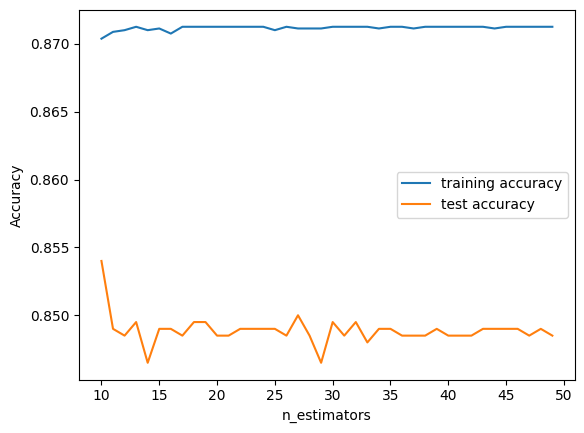

In [13]:
training_accuracy = []
test_accuracy = []
n_esti=[]
accuracy=[]
max=0
depth = range(10,50)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    if forest_test.score(X_test, y_test)>=0.86:
        n_esti.append(n)
        accuracy.append(forest_test.score(X_test, y_test))
        max=forest_test.score(X_test, y_test)

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

df=pd.DataFrame({"n_estimators":n_esti, "accuracy":accuracy})
df=df.sort_values("accuracy")
print(df)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
forest = RandomForestClassifier()
param_grid = {'n_estimators': [11,13,20,24,42],
'max_depth': [4,5,6],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True]
}

forest_random = RandomizedSearchCV(estimator = forest, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [15]:
forest_random.fit(X_train, y_train)

c:\Users\Tejaswi\OneDrive\Desktop\ineuron\env\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [4, 5, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [11, 13, 20, 24, 42]},
                   random_state=42, verbose=2)

In [16]:
forest_random.best_params_

{'n_estimators': 20, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}

In [17]:
forest_pred= forest_random.predict(X_test)

In [18]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1002
           1       0.98      0.64      0.77       998

    accuracy                           0.81      2000
   macro avg       0.86      0.81      0.81      2000
weighted avg       0.86      0.81      0.81      2000



In [19]:

storeResults('Random Forest',
accuracy_score(y_test,forest_pred),
recall_score(y_test,forest_pred),
precision_score(y_test,forest_pred),
f1_score(y_test,forest_pred))

<hr>

#### XGBoost 

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

In [22]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [23]:
xgb_pred = xgb.predict(X_test)

In [24]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1002
           1       0.94      0.75      0.83       998

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [25]:

storeResults('XGBoost',
accuracy_score(y_test,xgb_pred),
recall_score(y_test,xgb_pred),
precision_score(y_test,xgb_pred),
f1_score(y_test,xgb_pred))

<hr>

#### Gradient Boost

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

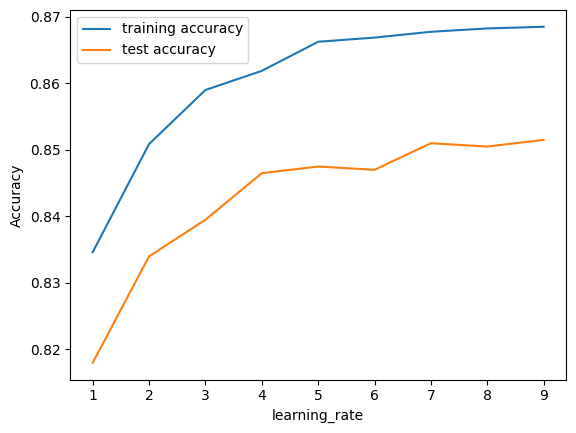

In [27]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

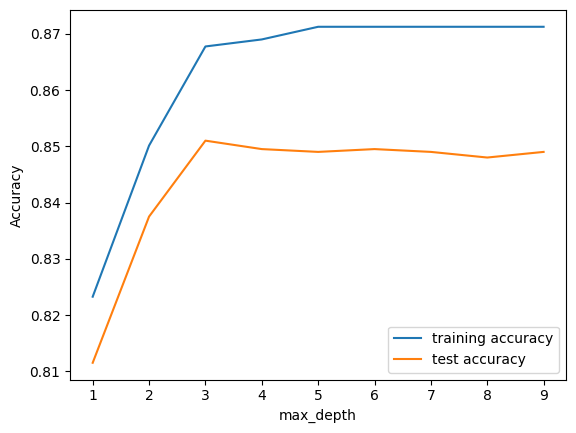

In [28]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
gbc = XGBClassifier()
param_grid = {'learning_rate':[0.5,0.6,0.7,0.8,0.9],
'max_depth':[3,4,5]
}

gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid, scoring='roc_auc',n_jobs=10,cv=10)

In [30]:
gbc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=10,
                   param_distributions={'learning_rate': [0.5, 0.6, 0.7, 0.8,
                                                          0.9],
                                        'max_depth': [3, 4, 5]},
                   scoring='roc_auc')

In [31]:
gbc_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [32]:
gbc_pred = gbc_random.predict(X_test)

In [33]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1002
           1       0.94      0.74      0.83       998

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [34]:

storeResults('Gradient Boost',
accuracy_score(y_test,gbc_pred),
recall_score(y_test,gbc_pred),
precision_score(y_test,gbc_pred),
f1_score(y_test,gbc_pred))

<hr>

#### Multilayer Perceptron

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
mlp = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,),(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid,n_jobs=-1,cv=5)

In [37]:
mlp_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001, 0.05],
                                        'hidden_layer_sizes': [(100,), (50,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam']})

In [38]:
mlp_pred = mlp_random.predict(X_test)

In [39]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1002
           1       0.95      0.72      0.82       998

    accuracy                           0.84      2000
   macro avg       0.86      0.84      0.84      2000
weighted avg       0.86      0.84      0.84      2000



In [40]:

storeResults('Multi-Layer Perceptron',
accuracy_score(y_test,mlp_pred),
recall_score(y_test,mlp_pred),
precision_score(y_test,mlp_pred),
f1_score(y_test,mlp_pred))

<hr>

#### Comparision

In [41]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Recall'   : recall,
                        'Precision': precision,
                        'f1_score' : f1
                      })

In [42]:
# dispalying total result
result

,ML Model,Accuracy,Recall,Precision,f1_score
0,Random Forest,0.812,0.635,0.980,0.771
1,XGBoost,0.848,0.746,0.937,0.831
2,Gradient Boost,0.849,0.744,0.941,0.831
3,Multi-Layer Perceptron,0.840,0.719,0.947,0.818


In [43]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['f1_score', 'Recall','Accuracy'],ascending=False).reset_index(drop=True)

In [44]:
# dispalying total result
sorted_result

,ML Model,Accuracy,Recall,Precision,f1_score
0,XGBoost,0.848,0.746,0.937,0.831
1,Gradient Boost,0.849,0.744,0.941,0.831
2,Multi-Layer Perceptron,0.840,0.719,0.947,0.818
3,Random Forest,0.812,0.635,0.980,0.771


<hr>

#### Storing the best Model


In [45]:
import pickle

# dump information to that file
# pickle.dump(gbc, open('pickle/model.pkl', 'wb'))